In [2]:
# all imports
import xmltodict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# set default visual parameters
default_params = {
              'font.family': 'Helvetica',
              'axes.labelsize': 20,
              'axes.labelweight': 'bold',  # Make axes labels bold
              'xtick.labelsize': 18,
              'xtick.major.size': 7,
              'xtick.major.width': 2.0,
              'xtick.direction': 'out',
              'font.size': 24,
              'axes.linewidth': 2.0,
              'lines.dashed_pattern': (5, 2.5),
              'lines.markersize': 10,
              'lines.linewidth': 3,
              'lines.markeredgewidth': 1,
              'lines.markeredgecolor': 'k',
              'legend.fontsize': 16,  # Adjust the font size of the legend
              'legend.title_fontsize': 24,  # Increase legend title size if needed
              'legend.frameon': True
    }
plt.rcParams.update(default_params)

# Convert xrdml file to a csv file
def xrdml2csv(xrdml_file, csv_file):

    with open(xrdml_file) as f:
        xrdml = xmltodict.parse(f.read())
    axis_dict = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['positions'][0]
    assert axis_dict['@axis'] == '2Theta', 'Only 2Theta axis is supported'
    startPos = float(axis_dict['startPosition'])
    endPos = float(axis_dict['endPosition'])

    data = xrdml['xrdMeasurements']['xrdMeasurement']['scan']['dataPoints']['intensities']['#text']
    intensities = np.array(data.split(), dtype=float)
    two_theta = np.linspace(startPos, endPos, len(intensities))

    df = pd.DataFrame({'2Theta': two_theta, 'Intensity': intensities})
    df.to_csv(csv_file, index=False)
    return df

# Can be used to read ASC files as well as txt
def txt2csv(input_file, output_file):
    with open(input_file, 'r') as txt_file:
        lines = txt_file.readlines()
        
    # Assuming the first line is the header
    data_lines = lines[1:]
    
    with open(output_file, 'w', newline='') as csv_file:
        csv_writer = csv.writer(csv_file)
        
        csv_writer.writerow(['2Theta', 'Intensity'])

        for line in data_lines:
            columns = line.strip().split()  # Adjust this if the delimiter is different (e.g., tab or comma)
            csv_writer.writerow([columns[0], columns[1]]) 

txt2csv('/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.ASC','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv')
txt2csv('/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.ASC','/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv')


In [3]:
# MnF3 Graph

# List of CSV files

MnF3_0mins='/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240918-MnF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
MnF3_20mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/MnF3_1to1_KS6Lgraphite/20mins/240925-MnF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
MnF3_100mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/240920-MnF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

zero_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240918-MnF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
twenty_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240925-MnF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
hundred_mins_fit = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Calculated_Profile_240920-MnF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'
Mn2F5_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/Mn2F5_ref.csv'
MnF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/MnF3/MnF3_ref.csv'

def plot_MnF3(ax):
    
    csv_files =  [MnF3_0mins, MnF3_20mins, MnF3_100mins, 
                  zero_mins_fit, twenty_mins_fit,hundred_mins_fit,
                  graphite_ref,Mn2F5_ref,MnF3_ref]
    MnF3_vertical_shift = [28000,19200,15000,
                           28000,19200,15000,
                           0,5000,10000]
    linewidth = [4,4,4,
                 1,1,1,
                 None,None,None]
    colors = ['#5A93DB', 'orange', '#49B658',
              'black','black','black',
              'black','black','black']  # Colors for each CSV
    legend_labels = ['Hand mixed', '20 Minutes Milled','100 Minutes Milled',
                     None,None,None,
                     None,None,None]
    fig, ax = plt.subplots()

    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        data = pd.read_csv(csv_file)
        
        if csv_file in {MnF3_ref,Mn2F5_ref,graphite_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = MnF3_vertical_shift[i],width = 0.25,color=colors[i % len(colors)], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], MnF3_vertical_shift[i]+data['Intensity'], linestyle='-', linewidth = linewidth[i], color=colors[i], label = legend_labels[i])
    

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    # Base lines for reference XRD
    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.axhline(y=10000, c = 'black', linewidth=1)

    ax.text(52.5,2000,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(52.5,7000,'Mn$_2$F$_5$ ICDD:04-028-6055',family = 'Helvetica', size = 8)
    ax.text(52.5,12000,'MnF$_3$ ICDD:04-027-1133',family = 'Helvetica', size = 8)

    # Graphite ref
    ax.plot(26.544, 3800, '*', c='black',markersize = 7)
    ax.plot(26.544, 34000, '*', c='black',markersize = 7)

    # MnF3 ref
    ax.plot(49.216, 11300, 'o', c='black',markersize = 5)
    ax.plot(49.216, 32500, 'o', c='black',markersize = 5)
    ax.plot(53.26, 11500, 'o', c='black',markersize = 5)
    ax.plot(53.26, 31500, 'o', c='black',markersize = 5)
    ax.plot(32.601, 11500, 'o', c='black',markersize = 5)
    ax.plot(32.601, 24600, 'o', c='black',markersize = 5)
    ax.plot(32.601, 32500, 'o', c='black',markersize = 5)
    ax.plot(34.026, 11500, 'o', c='black',markersize = 5)
    ax.plot(34.026, 24600, 'o', c='black',markersize = 5)
    ax.plot(34.026, 33000, 'o', c='black',markersize = 5)
    ax.plot(39.988, 11600, 'o', c='black',markersize = 5)
    ax.plot(39.988, 32500, 'o', c='black',markersize = 5)
    ax.plot(24.034, 14000, 'o', c='black',markersize = 5)
    ax.plot(24.034, 20500, 'o', c='black',markersize = 5)
    ax.plot(24.034, 30700, 'o', c='black',markersize = 5)
    ax.plot(24.034, 47800, 'o', c='black',markersize = 5)


    # Mn2F5 ref
    ax.plot(22.992, 8600, 'v', c='black',markersize = 6)
    ax.plot(22.9923, 20500, 'v', c='black',markersize = 6)
    ax.plot(27.103, 8900, 'v', c='black',markersize = 6)
    ax.plot(27.103, 20000, 'v', c='black',markersize = 6)
    ax.plot(29.028, 7000, 'v', c='black',markersize = 6)
    ax.plot(29.028, 19500, 'v', c='black',markersize = 6)
    ax.plot(46.98, 6500, 'v', c='black',markersize = 6)
    ax.plot(46.98, 18300, 'v', c='black',markersize = 6)



    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 65)
    ax.grid(True)

    return fig, ax


In [4]:
# VF4 graph

# raw data
zero_mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
hundred_mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

# fitted data
fit_0mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
fit_100mins_VF4 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/Calculated_Profile_240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

# reference data
VF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF3_ref.csv'
VF4_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_ref.csv'

def plot_VF4(ax):
    
    csv_files = [zero_mins_VF4,hundred_mins_VF4, 
                graphite_ref, VF3_ref,VF4_ref, 
                fit_0mins_VF4,fit_100mins_VF4]

    VF4_vertical_shift = [21000,15000,
                    0,5000,10000,
                    21000,15000] # Vertical shift for each data set

    linewidth = [4,4,None,None,None,1,1]

    colors = [ '#5A93DB', 'orange',
            'black','black','black',
            'black','black']

    legend_labels = ['Hand mixed','Milled 100 minutes',
                    None,None,None,
                    None,None]

    fig, ax = plt.subplots()

    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file in {VF3_ref, VF4_ref, graphite_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = VF4_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], VF4_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    
    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.axhline(y=10000, c = 'black', linewidth=1)
    ax.text(57.5,2000,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(57.5,7000,'VF$_3$ ICDD:04-005-4224',family = 'Helvetica', size = 8)
    ax.text(57.5,12000,'VF$_4$ ICDD:04-007-1428',family = 'Helvetica', size = 8)

    # Graphite ref
    ax.plot(26.544, 3600, '*', c='black',markersize = 7)
    ax.plot(26.544, 24500, '*', c='black',markersize = 7)

    # VF4 ref
    ax.plot(64.121, 10800, 'o', c='black',markersize = 5)
    ax.plot(64.121, 22400, 'o', c='black',markersize = 5)
    ax.plot(42.62, 11500, 'o', c='black',markersize = 5)
    ax.plot(42.62, 23000, 'o', c='black',markersize = 5)
    ax.plot(38.712, 11500, 'o', c='black',markersize = 5)
    ax.plot(38.712, 23000, 'o', c='black',markersize = 5)
    ax.plot(25.754, 13500, 'o', c='black',markersize = 5)
    ax.plot(25.754, 30000, 'o', c='black',markersize = 5)
    ax.plot(53.152, 11000, 'o', c='black',markersize = 5)
    ax.plot(53.152, 22500, 'o', c='black',markersize = 5)

    # VF3 ref
    ax.plot(23.82, 8500, 'v', c='black',markersize = 6)
    ax.plot(23.82, 23100, 'v', c='black',markersize = 6)
    ax.plot(23.82, 27100, 'v', c='black',markersize = 6)


    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 70)
    ax.grid(True)

    return fig, ax

Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta    Intensity
0  20.025356  6758.756011
1  20.042356  6686.099461
2  20.059356  6634.503153
3  20.076356  6662.760215
4  20.093356  6672.740836
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta    Intensity
0  20.025356  6562.038760
1  20.042356  6677.585337
2  20.059356  6661.646039
3  20.076356  6592.228353
4  20.093356  6726.371699
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta    Intensity
0  20.025356  6773.100104
1  20.042356  6764.200207
2  20.059356  6755.300311
3  20.076356  6746.400414
4  20.093356  6737

/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/1867596985.py:64: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)


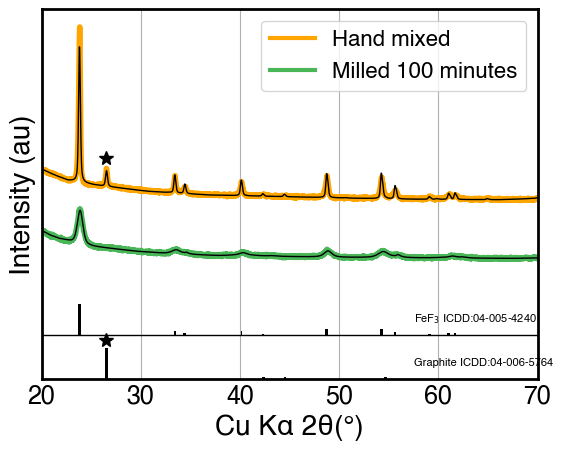

In [9]:
# FeF3 graph

# Raw data
zero_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
hundred_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

# Fitted data

fit_0mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'
fit_100mins = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

def plot_FeF3(ax):

    FeF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/FeF3_ref.csv'
    graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'
    csv_files = [zero_min,hundred_min,
                fit_0mins,fit_100mins,
                FeF3_ref, graphite_ref]

    colors = ['orange', '#49B658',
            'black','black',
            'black','black']  # Colors for each CSV

    legend_labels = ['Hand mixed','Milled 100 minutes',None,None,None,None]

    FeF3_vertical_shift =  [17000,10000, 
                    17000,10000,
                    5000,0] # Vertical shift for each data set

    linewidth = [4,4,1,1,None,None]

    fig, ax = plt.subplots()

    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file in {FeF3_ref,graphite_ref}:
            ax.bar(data['2Theta'], 35*data['Intensity'], bottom = FeF3_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], FeF3_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    

    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]  # Creates custom handles for legend
    legend_labels_for_plot = [label for label in legend_labels if label is not None]

    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.text(57.5,1500,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(57.5,6500,'FeF$_3$ ICDD:04-005-4240',family = 'Helvetica', size = 8)

    # graphite
    ax.plot(26.544, 4400, '*', c='black',markersize = 10)
    ax.plot(26.544, 25000, '*', c='black',markersize = 10)

    
    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 70)
    ax.grid(True)

    return fig, ax

fig, ax = plot_FeF3([0,0])

In [6]:

# CoF3 Graph

# List of CSV files

# Raw data   
zero_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv' 
twenty_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_20mins_CoF3/Re-analyzed_250227_scanned_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
hundred_min = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv'

# Reference peaks
CoF3_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_ref.csv'
CoF2_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF2_ref.csv'
graphite_ref = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv'

# Rietveld fits
fit_100 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_100min_fitted_data.csv'
fit_20 = '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/rr_asc_20mins/Calculated_Profile_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv'
fit_0 =  '/Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_0mins_CoF3/Calculated_Profile_240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv'

def plot_CoF3(ax):
    

    csv_files = [zero_min,twenty_min, hundred_min, 
                CoF3_ref,CoF2_ref, graphite_ref, 
                fit_100, fit_20, fit_0]

    CoF3_vertical_shift = [19000,5000, 9000,
                    10000,5000,0,
                    9000,5000,19000] # Vertical shift for each data set
 # Vertical shift for each data set
    print(CoF3_vertical_shift)

    linewidth = [4,4,4,None,None,None,1,1,1]

    colors = [ '#5A93DB', 'orange', '#49B658',
            'black','black','black',
            'black','black','black']

    legend_labels = ['Hand mixed', 'Milled 20 minutes', 'Milled 100 minutes',
                    None,None,None,
                    None,None,None]

    fig, ax = plt.subplots()
    # Loop through each CSV and plot
    for i, csv_file in enumerate(csv_files):
        
        data = pd.read_csv(csv_file)
        print(f'Data from {csv_file}:')
        print(data.head())
        
        if csv_file in {CoF2_ref, CoF3_ref, graphite_ref}:
            ax.bar(data['2Theta'], 30*data['Intensity'], bottom = CoF3_vertical_shift[i], width = 0.25,color=colors[i], label = legend_labels[i])
        else:
            ax.plot(data['2Theta'], CoF3_vertical_shift[i]+data['Intensity'],linewidth = linewidth[i],linestyle='-', color=colors[i], label = legend_labels[i])
    
    ax.axhline(y=5000, c = 'black', linewidth=1)
    ax.axhline(y=10000, c = 'black', linewidth=1)
    ax.text(57.5,1500,'Graphite ICDD:04-006-5764',family = 'Helvetica', size = 8)
    ax.text(57.5,6500,'CoF$_2$ ICDD:04-005-4250',family = 'Helvetica', size = 8)
    ax.text(57.5,11500,'CoF$_3$ ICDD:04-007-3552',family = 'Helvetica', size = 8)

    # graphite
    ax.plot(26.544, 3900, '*', c='black',markersize = 10)
    ax.plot(26.544, 28500, '*', c='black',markersize = 10)

    # CoF2
    ax.plot(26.829, 9100, 'v', c='black',markersize = 7)
    ax.plot(39.2, 16000, 'v', c='black',markersize = 7)
    ax.plot(39.2, 6300, 'v', c='black',markersize = 7)
    ax.plot(26.829, 17500, 'v', c='black',markersize = 7)
    ax.plot(52.158, 8000, 'v', c='black',markersize = 7)
    ax.plot(52.158, 16500, 'v', c='black',markersize = 7)
    ax.plot(52.158, 19000, 'v', c='black',markersize = 7)


    # CoF3
    ax.plot(35.52, 11000, 'o', c='black',markersize = 6)
    ax.plot(35.52, 19500, 'o', c='black',markersize = 6)
    ax.plot(35.52, 27000, 'o', c='black',markersize = 6)
    ax.plot(41.23, 11500, 'o', c='black',markersize = 6)
    ax.plot(41.23, 28000, 'o', c='black',markersize = 6)
    ax.plot(41.23, 19500, 'o', c='black',markersize = 6)
    ax.plot(50.05, 19500, 'o', c='black',markersize = 6)
    ax.plot(50.05, 28000, 'o', c='black',markersize = 6)
    ax.plot(50.05, 11200, 'o', c='black',markersize = 6)
    ax.plot(24.412, 39000, 'o', c='black',markersize = 6)
    ax.plot(24.412, 26000, 'o', c='black',markersize = 6)
    ax.plot(24.412, 13800, 'o', c='black',markersize = 6)


    custom_handles = [Line2D([0], [0], color=color, lw=3) for color in colors]
    legend_labels_for_plot = [label for label in legend_labels if label is not None]
    ax.set_yticks([])
    ax.tick_params(axis='x', length=0)
    ax.set_xlabel('Cu Kα 2θ(°)')
    ax.set_ylabel('Intensity (au)')
    ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
    ax.set_xlim(20, 70)
    ax.grid(True)

    return fig, ax
    



Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     8543.0
1  20.025067     8424.0
2  20.041778     8470.0
3  20.058489     8628.0
4  20.075201     8509.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     7218.0
1  20.025067     7279.0
2  20.041778     7181.0
3  20.058489     7433.0
4  20.075201     7285.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/FeF3_1to1_KS6Lgraphite/Calculated_Profile_240828-FeF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta    Intensity
0  20.025356  6773.100104
1  20.042356  6764.200207
2  20.059356  6755.300311
3  20.076356  6746.400414
4  20.093356  6737.500518
Data from /Users/deliaharms/git/herald_visualization

/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/80345338.py:64: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)


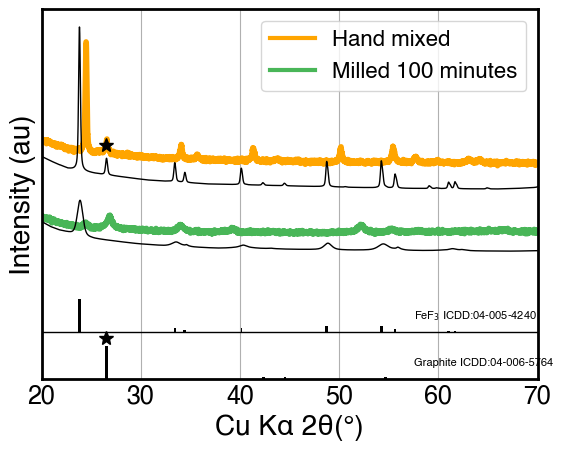

In [7]:
# plot_CoF3([0,0])
# plot_FeF3([0,0])
# plot_MnF3([0,0])
# plot_VF4([0,0])
fig2, ax2 = plot_FeF3([0,0])
# fig1, ax1 = plot_CoF3([0,0])
# fig3, ax3 = plot_MnF3([0,0])
# fig4, ax4 = plot_VF4([0,0])

[19000, 5000, 9000, 10000, 5000, 0, 9000, 5000, 19000]
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     8543.0
1  20.025067     8424.0
2  20.041778     8470.0
3  20.058489     8628.0
4  20.075201     8509.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/CoF3_1to1_KS6Lgraphite/RR_ASC_20mins_CoF3/Re-analyzed_250227_scanned_240925-CoF3_1to1_KS6Lgraphite-20min_milled-20-70deg_40min.csv:
      2Theta     Intensity
0  20.025356  16447.505255
1  20.042356  16590.829326
2  20.059356  16594.407175
3  20.076356  16256.387596
4  20.093356  16519.078440
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/240827-CoF3_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     7218.0
1  20.025067     7279.0
2  20.041778     7181.0
3  20.

/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/3432993695.py:97: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 3
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/80345338.py:64: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/3516624719.py:98: UserWarning: Mismatched number of handles and labels: len(handles) = 9 len(labels) = 3
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)
/var/folders/yc/_wrbszhx64zb5q_ph5l_vhy00000gn/T/ipykernel_82304/2684343132.py:86: UserWarning: Mismatched number of handles and labels: len(handles) = 7 len(labels) = 2
  ax.legend(handles=custom_handles, labels=legend_labels_for_plot)


Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240827-VF4_1to1_KS6Lgraphite-0min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     3779.0
1  20.025067     3918.0
2  20.041778     3794.0
3  20.058489     3692.0
4  20.075201     3704.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/VF4_1to1_KS6Lgraphite/VF4_1to1_KS6Lgraphite_raw/240920-VF4_1to1_KS6Lgraphite-100min_milled-20-70deg_40min.csv:
      2Theta  Intensity
0  20.008356     3426.0
1  20.025067     3297.0
2  20.041778     3385.0
3  20.058489     3252.0
4  20.075201     3282.0
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia_Scripts/CoF3/Graphite_ref.csv:
   2Theta  Intensity
0  26.544        100
1  42.363          7
2  44.561          6
3  50.698          1
4  54.663          7
Data from /Users/deliaharms/git/herald_visualization/herald_visualization/Delia

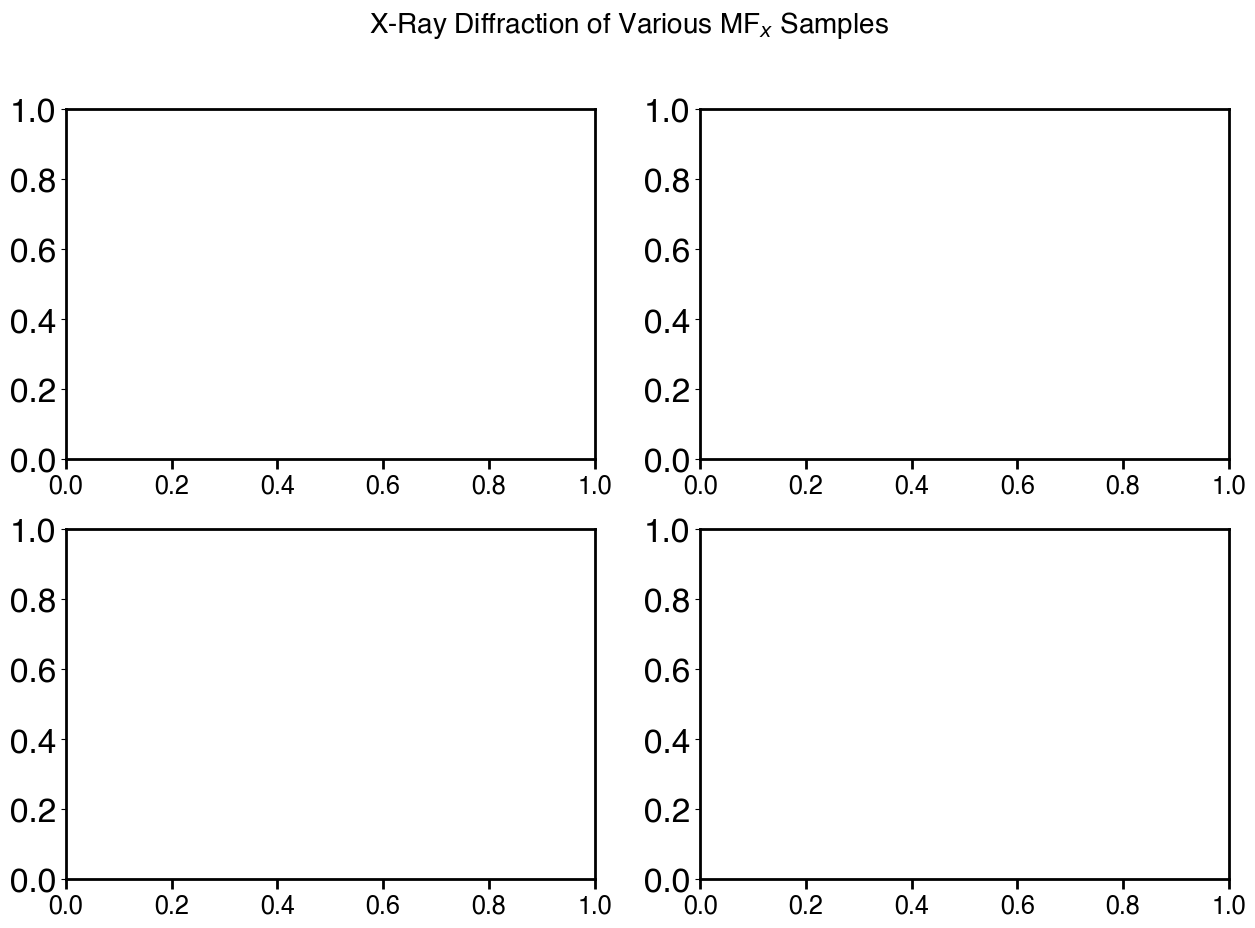

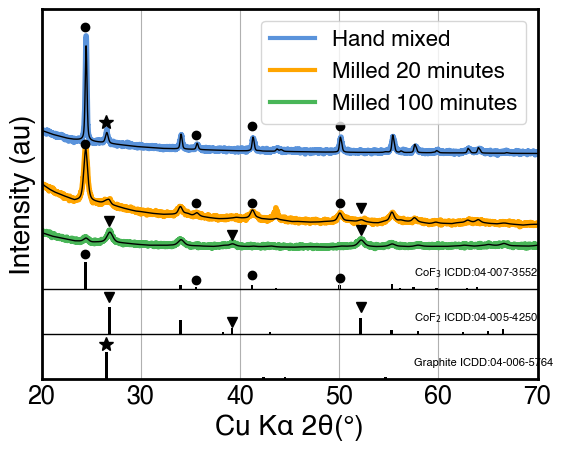

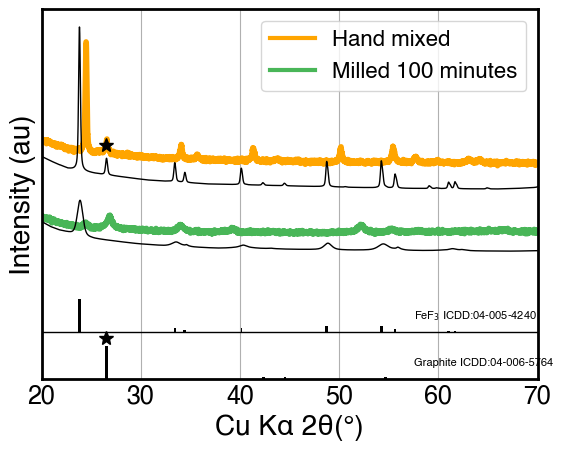

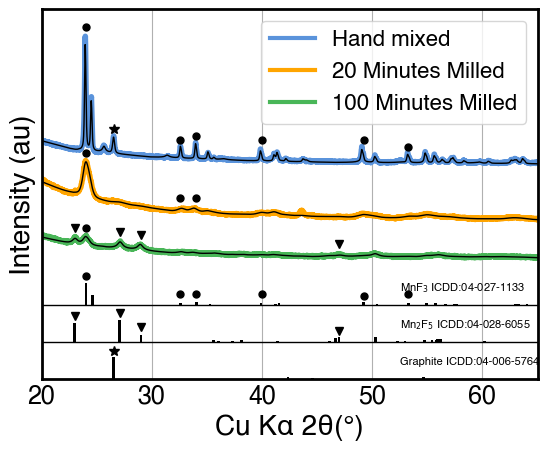

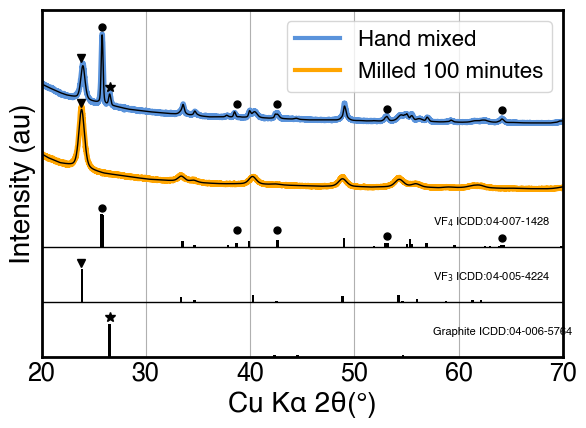

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Call your plotting functions here (plot_CoF3, plot_FeF3, etc.)
plot_CoF3(axs[0, 0])
plot_FeF3(axs[0, 1])
plot_MnF3(axs[1, 0])
plot_VF4(axs[1, 1])

# Add a title for the full plot
fig.suptitle('X-Ray Diffraction of Various MF$_x$ Samples', fontsize=20)

plt.tight_layout()
plt.show()